In [171]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_datareader as data
import yfinance as yf

In [172]:
start = '2013-01-01'
end = '2023-10-12'

df = yf.download('AXISBANK.NS', start ,end )
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,273.940002,274.299988,272.100006,272.540009,257.542236,3343610
2013-01-02,274.230011,278.880005,273.329987,277.369995,262.106415,7168225
2013-01-03,278.799988,279.299988,276.649994,277.989990,262.692291,4750195
2013-01-04,276.489990,277.390015,274.000000,275.790009,260.613373,6262900
2013-01-07,277.000000,277.540009,273.100006,274.570007,259.460480,5715850


In [173]:
df.shape

(2660, 6)

In [174]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-05,1000.000000,1009.200012,988.900024,1003.250000,1003.250000,7950412
2023-10-06,1005.000000,1008.000000,999.400024,1000.950012,1000.950012,5289753
2023-10-09,994.799988,999.700012,988.250000,996.250000,996.250000,6823214
2023-10-10,999.900024,1014.950012,996.500000,1012.250000,1012.250000,5728499
2023-10-11,1019.000000,1025.650024,1012.000000,1019.099976,1019.099976,7396783


In [175]:
df = df.reset_index()

In [176]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,273.940002,274.299988,272.100006,272.540009,257.542236,3343610
1,2013-01-02,274.230011,278.880005,273.329987,277.369995,262.106415,7168225
2,2013-01-03,278.799988,279.299988,276.649994,277.989990,262.692291,4750195
3,2013-01-04,276.489990,277.390015,274.000000,275.790009,260.613373,6262900
4,2013-01-07,277.000000,277.540009,273.100006,274.570007,259.460480,5715850
...,...,...,...,...,...,...,...
2655,2023-10-05,1000.000000,1009.200012,988.900024,1003.250000,1003.250000,7950412
2656,2023-10-06,1005.000000,1008.000000,999.400024,1000.950012,1000.950012,5289753
2657,2023-10-09,994.799988,999.700012,988.250000,996.250000,996.250000,6823214
2658,2023-10-10,999.900024,1014.950012,996.500000,1012.250000,1012.250000,5728499


In [177]:
df.drop(['Date' , 'Adj Close'], axis= 1, inplace  = True)

In [178]:
df

,Open,High,Low,Close,Volume
0,273.940002,274.299988,272.100006,272.540009,3343610
1,274.230011,278.880005,273.329987,277.369995,7168225
2,278.799988,279.299988,276.649994,277.989990,4750195
3,276.489990,277.390015,274.000000,275.790009,6262900
4,277.000000,277.540009,273.100006,274.570007,5715850
...,...,...,...,...,...
2655,1000.000000,1009.200012,988.900024,1003.250000,7950412
2656,1005.000000,1008.000000,999.400024,1000.950012,5289753
2657,994.799988,999.700012,988.250000,996.250000,6823214
2658,999.900024,1014.950012,996.500000,1012.250000,5728499


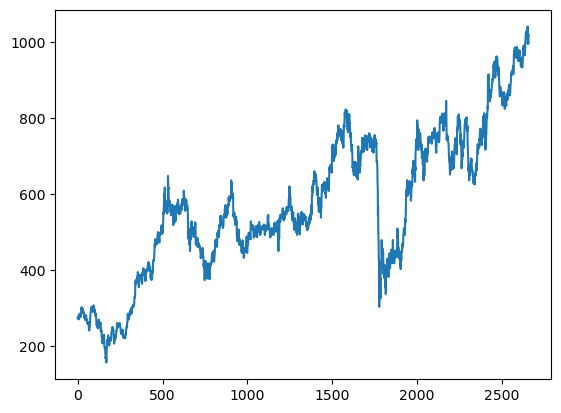

In [179]:
plt.plot(df['Close'])

In [180]:
ma100 = df.Close.rolling(100).mean()
print(ma100)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2655    967.941002
2656    968.792502
2657    969.577002
2658    970.551502
2659    971.595502
Name: Close, Length: 2660, dtype: float64


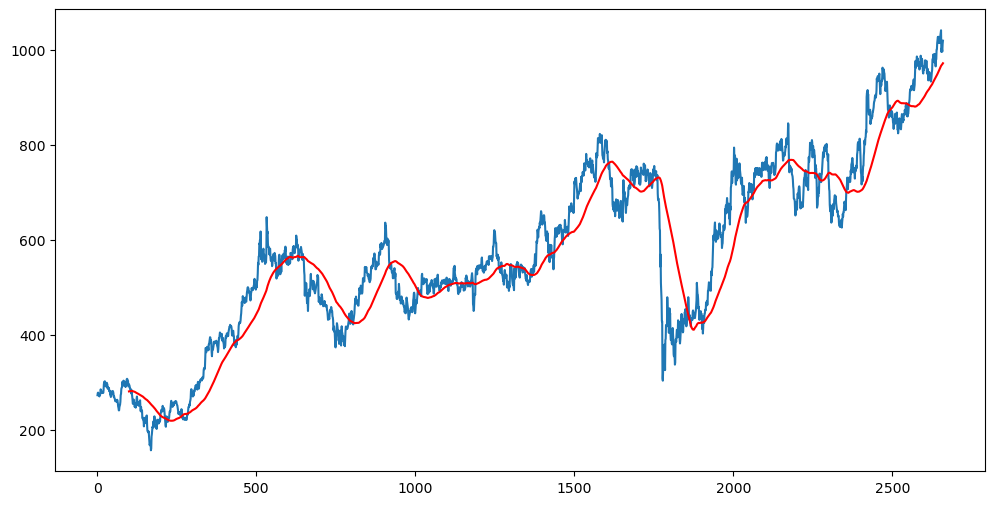

In [181]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100 , color = 'r')
plt.show()

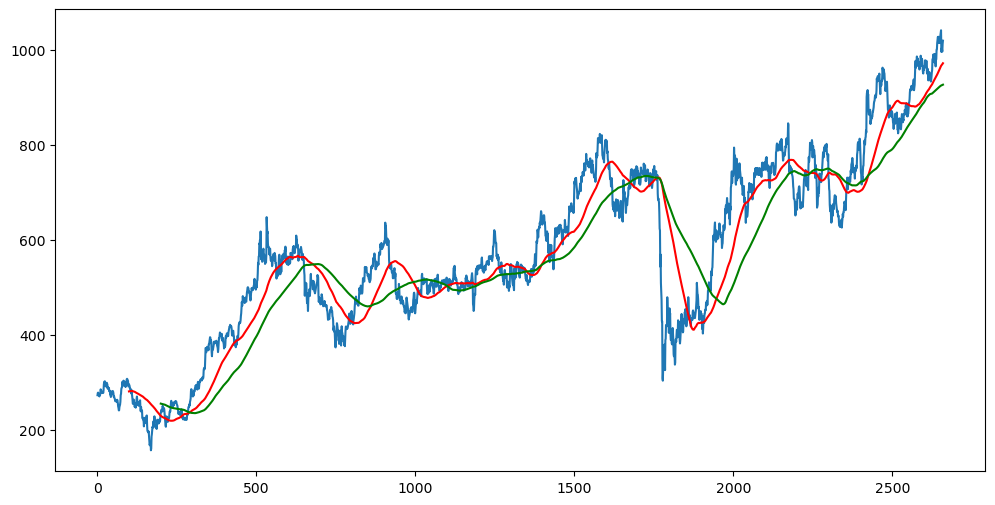

In [182]:
ma200= df.Close.rolling(200).mean()
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100 , color = 'r')
plt.plot(ma200 , color = 'g')

plt.show()

In [183]:
#spltting data into train test 
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(' training ', data_training.shape)
print(' testing ', data_testing.shape)

 training  (1861, 1)
 testing  (799, 1)


In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


In [185]:
data_training_array = scaler.fit_transform(data_training)

In [186]:
data_training_array

array([[0.17406902],
       [0.18131875],
       [0.18224935],
       ...,
       [0.48388697],
       [0.45671916],
       [0.43382917]])

In [187]:
x_train = []
y_train = []

for i in range(100 ,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [188]:
#ML model 
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [189]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [190]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_20 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_21 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_21 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_22 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_22 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_23 (LSTM)              (None, 120)              

In [191]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs = 50 )

Epoch 1/50
56/56 [==============================] - 25s 270ms/step - loss: 0.0542
Epoch 2/50
56/56 [==============================] - 13s 233ms/step - loss: 0.0139
Epoch 3/50
56/56 [==============================] - 13s 232ms/step - loss: 0.0120
Epoch 4/50
56/56 [==============================] - 13s 230ms/step - loss: 0.0100
Epoch 5/50
56/56 [==============================] - 13s 230ms/step - loss: 0.0091
Epoch 6/50
56/56 [==============================] - 13s 235ms/step - loss: 0.0107
Epoch 7/50
56/56 [==============================] - 13s 228ms/step - loss: 0.0091
Epoch 8/50
56/56 [==============================] - 13s 227ms/step - loss: 0.0085
Epoch 9/50
56/56 [==============================] - 13s 229ms/step - loss: 0.0084
Epoch 10/50
56/56 [==============================] - 13s 233ms/step - loss: 0.0080
Epoch 11/50
56/56 [==============================] - 13s 232ms/step - loss: 0.0076
Epoch 12/50
56/56 [==============================] - 13s 229ms/step - loss: 0.0081
Epoch 13/50
5

In [192]:
model.save('model.h5')

/home/harsh/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [193]:
data_testing.head()

,Close
1861,431.549988
1862,437.049988
1863,440.899994
1864,425.850006
1865,431.649994


In [194]:
pass_100_days = data_training.tail(100)

In [195]:
final_df = pd.concat([pass_100_days, data_testing], ignore_index=True)


In [196]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.58639375],
       [0.53415092],
       [0.51639787],
       [0.52039572],
       [0.51368748],
       [0.50786015],
       [0.48041741],
       [0.43420514],
       [0.42851329],
       [0.32538283],
       [0.3600081 ],
       [0.27842526],
       [0.25098252],
       [0.23079009],
       [0.16953516],
       [0.16939964],
       [0.00745358],
       [0.        ],
       [0.0320504 ],
       [0.05183629],
       [0.07670416],
       [0.08808781],
       [0.10279171],
       [0.07521344],
       [0.03022092],
       [0.11614041],
       [0.1195284 ],
       [0.15855806],
       [0.15693185],
       [0.15469574],
       [0.16181052],
       [0.23804036],
       [0.20707414],
       [0.15923566],
       [0.17346523],
       [0.1719745 ],
       [0.13660389],
       [0.16824771],
       [0.20639654],
       [0.18423906],
       [0.19209919],
       [0.13504538],
       [0.11634368],
       [0.11614041],
       [0.12765958],
       [0.10692504],
       [0.10353705],
       [0.113

In [197]:
input_data.shape

(899, 1)

In [198]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [199]:
x_test, y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(799, 100, 1)
(799,)


In [200]:
#make prediction 

y_predicted = model.predict(x_test)

25/25 [==============================] - 3s 80ms/step


In [201]:
y_predicted.shape

(799, 1)

In [202]:
y_test

array([0.1740073 , 0.18146088, 0.1866784 , 0.1662827 , 0.17414282,
       0.15476352, 0.17075483, 0.178615  , 0.17597235, 0.17637889,
       0.17339748, 0.19630031, 0.20050142, 0.19643583, 0.17983467,
       0.18295161, 0.19331886, 0.19115057, 0.178615  , 0.18606858,
       0.19331886, 0.20145004, 0.21710259, 0.23024798, 0.27923838,
       0.26236616, 0.24739125, 0.24562947, 0.23282288, 0.20605774,
       0.21080093, 0.19135384, 0.17360075, 0.19474184, 0.19521616,
       0.18620407, 0.19840084, 0.19358991, 0.18938879, 0.18999865,
       0.16289471, 0.14751321, 0.15801599, 0.13457109, 0.15164655,
       0.18444233, 0.1676379 , 0.16465645, 0.19047297, 0.19108279,
       0.19853637, 0.20321182, 0.20158557, 0.22347199, 0.22340425,
       0.21439219, 0.22787638, 0.21608619, 0.22936711, 0.25721643,
       0.25857163, 0.26873561, 0.28072907, 0.27652799, 0.2577585 ,
       0.27774766, 0.27314   , 0.2584361 , 0.25660658, 0.2974658 ,
       0.31305057, 0.30085379, 0.32002978, 0.32335003, 0.35492

In [203]:
y_predicted

array([[0.17785989],
       [0.18079682],
       [0.18392606],
       [0.18681505],
       [0.18893084],
       [0.18989015],
       [0.18937123],
       [0.18749161],
       [0.18463352],
       [0.1812032 ],
       [0.17749164],
       [0.17372449],
       [0.1701432 ],
       [0.16700664],
       [0.16465929],
       [0.16324353],
       [0.16280529],
       [0.16336706],
       [0.16487584],
       [0.16707197],
       [0.16967821],
       [0.17246574],
       [0.17534721],
       [0.17852604],
       [0.18233092],
       [0.18718489],
       [0.19316113],
       [0.20007741],
       [0.20757699],
       [0.21528089],
       [0.22279632],
       [0.22970346],
       [0.23554924],
       [0.23937607],
       [0.24061891],
       [0.23905435],
       [0.2348586 ],
       [0.2286643 ],
       [0.22131807],
       [0.21341528],
       [0.20542598],
       [0.19769646],
       [0.19038865],
       [0.18356936],
       [0.17727353],
       [0.17152187],
       [0.1663542 ],
       [0.161

In [204]:
scaler.scale_

array([0.0013552])

In [205]:
scale_factor = 1/0.0013552
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

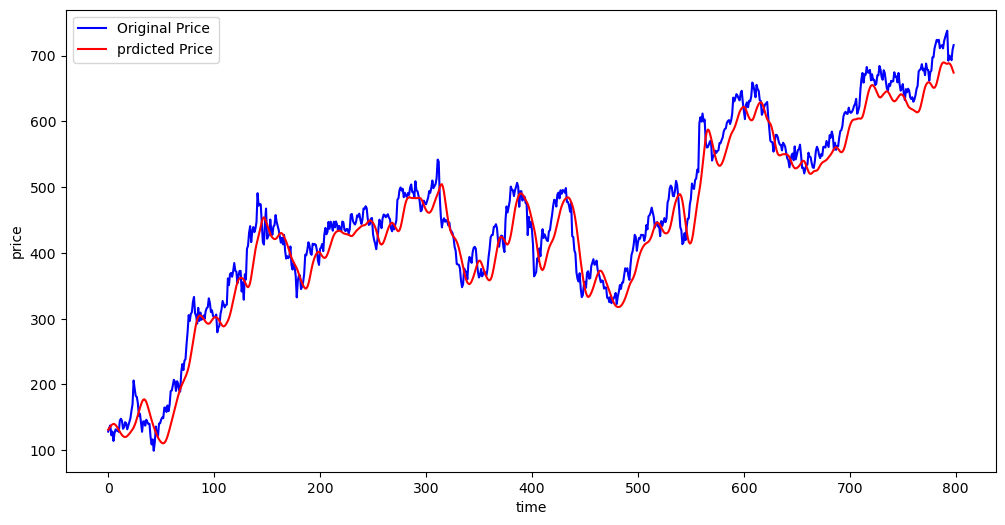

In [206]:
plt.figure(figsize= (12,6))
plt.plot(y_test , 'b', label = 'Original Price')
plt.plot(y_predicted , 'r', label = 'prdicted Price')

plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()